# Data Analysis - Programming - 3
## Week 1

## Onderwerpen week 1

- opgaven toets week 10
- Pandas - Series  
  Leerdoelen:
  - Series maken op verschillende wijzen  
    (random variates, Python list, kolom(men) in csv-bestand)
  - data in Series selecteren  
    (indexing & slicing op basis van indices en labels, boolean indexing)
  - kengetallen en samenvatting produceren voor Series
  - gebruikelijke statistische functies (numpy/scipy.stats) toepassen op Series

## Opgaven toets week 10

### Opgave 2

De dienst IT Services van ASML houdt een logboek bij van alle verleende diensten. In de bijlage `incidents.csv` vind je het logboek met alle vermeldingen van de jaren 2014 en 2015. De kolomkoppen in het bestand worden beschreven in de bijlage `incidents_description.txt`.
Tot slot heb je ook het bestand `Toets week 10 - DA - Opgave 2.ipynb` gekregen. Schrijf hierin jouw uitwerking van de onderstaande opgaven en e-mail (alleen) dit bestand naar de docent en de surveillant.

## Opgaven toets week 10

### Opgave 2a
Schrijf een Python functie genaamd `calculate_avg_duration` waarin de gemiddelde 'duration' wordt bepaald per categorie.

De functie heeft één argument genaamd `filename` dat bepaalt uit welk bestand de data zal worden gelezen.

De functie dient een dictionary terug te geven waarin de 'ticket category' de `key` is en de gemiddelde tijd voor afhandeling van dit vraagtype de `value`.

Een voorbeeld van het verwachte resultaat van de functie-aanroep zie je hieronder:

```python
duration_avgs = calculate_avg_duration("incidents.csv")
print(duration_avgs)
```
Output:
```
{'Fault': 68.290072475981802, 'Service Request': 68.217522658610278, 'Modification': 68.480795610425247, 'Assistance': 66.194503171247362, 'Incident': 69.994845360824741}
```

In [3]:
%pylab
%matplotlib inline
import scipy.stats as st

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
def calculate_avg_duration(filename):
    # VUL HIER ZELF DE GEVRAAGDE FUNCTIE IN
    # en verwijder de onderstaande regel 'pass'
    pass


## gebruik desgewenst de onderstaande code om je functie te controleren
# duration_avgs = calculate_avg_duration("incidents.csv")
# print("{:18}{}".format("Category", "Avg. duration (minutes)"))
# for category, avg_duration in duration_avgs.items():
#     print("{:18}{:.1f}".format(category, avg_duration))

In [6]:
def calculate_avg_duration(filename):
    durations = {}
    with open(filename, "r") as f:
        f.readline()
        for line in f:
            fields = line.split(",")
            category = fields[1]
            duration = int(fields[10])
            if category in durations:
                durations[category].append(duration)
            else:
                durations[category] = [duration]
    avg_durations = {}
    for category, values in durations.items():
        avg_durations[category] = np.mean(values)
    
    return avg_durations


duration_avgs = calculate_avg_duration("incidents.csv")
print("{:18}{}".format("Category", "Avg. duration (minutes)"))
for category, avg_duration in duration_avgs.items():
    print("{:18}{:.1f}".format(category, avg_duration))

Category          Avg. duration (minutes)
Incident          70.0
Assistance        66.2
Fault             68.3
Modification      68.5
Service Request   68.2


### Opgave 2b

Schrijf een Python programma waarmee je op __twee__ manieren onderzoekt of 'resolution time' normaal verdeeld is.

Het inlezen van de data in een NumPy-array, genaamd `durations`, is al voor je gedaan.

In [7]:
durations = np.loadtxt(
    "incidents.csv", delimiter=",", skiprows=1, usecols=[10,]
)

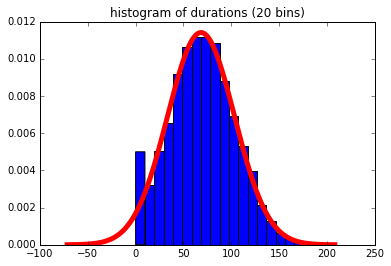

In [8]:
# methode 1: histogram en normale verdeling visueel vergelijken
mu = durations.mean()
sigma = durations.std()
rij = arange(mu - 4 * sigma, mu + 4 * sigma, 0.01)
X = st.norm(mu, sigma)
kansdichtheid = X.pdf(rij)
plt.hist(durations, normed=1, align='mid', bins=20)
plt.plot(rij, kansdichtheid, color='red', linewidth=5)
plt.title('histogram of durations (20 bins)')
plt.show()

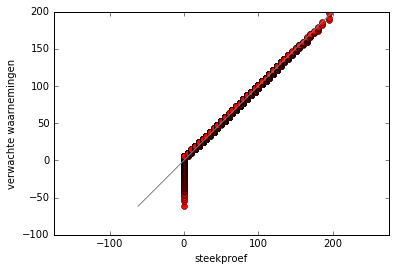

In [9]:
# methode 2: percentielen data vergelijken met kansverdeling mbv qq-plot
n = len(durations)
mu = durations.mean()
sigma = durations.std(ddof=0)
X = st.norm(mu, sigma)

verwachte_waarnemingen = []
durations.sort()

for i in range(n):
    verwachte_waarnemingen += [X.ppf(i/n)]

plt.plot(durations, verwachte_waarnemingen, 'ro')
plt.plot(verwachte_waarnemingen, verwachte_waarnemingen, color='grey')
plt.xlabel('steekproef')
plt.ylabel('verwachte waarnemingen')
plt.axis('equal')
plt.show()

In [10]:
# methode 3: verdeling data vergelijken met normale verdeling
# op basis van std deviatie
mu, stddev = durations.mean(), durations.std(ddof=0)
print("For a normally distributed variable, expect percentages "
      "along the lines of 68%, 95% and 99.7% within 1, 2 "
      "and 3 standard deviations from the mean.")
for i in range(1, 4):
    within_std = sum(np.abs(durations - mu) < i * stddev)
    print(
        "Percentage of data within {} std: {:.2f}%".format(
            i, 100 * (within_std / durations.size)
        )
    )

For a normally distributed variable, expect percentages along the lines of 68%, 95% and 99.7% within 1, 2 and 3 standard deviations from the mean.
Percentage of data within 1 std: 67.33%
Percentage of data within 2 std: 97.47%
Percentage of data within 3 std: 99.83%


## Pandas - Series (1)

NumPy is *de* Python library voor numerieke berekeningen in Python.  
Het belangrijkste datatype in NumPy is de array (ndarray).

SciPy is een verzameling Python libraries die een toolset vormt die gebruikt kan worden voor zeer diverse wetenschappelijke berekeningen en programma's.
SciPy gebruikt NumPy als numerieke basis, dus veel functies zijn automatisch geschikt om op vectoren/matrices te worden uitgevoerd.

Pandas is een Python library voor data analysis, gebouwd op NumPy en dus ook te gebruiken met SciPy. Pandas biedt enkele datatypen (Series, DataFrames en Panels) die het makkelijker maken om met data te werken in Python.

```python
import pandas as pd
```

In [11]:
import pandas as pd

## Pandas - Series (2)

Een Pandas Series is een gelabelde één-dimensionale array. De labels worden ook wel de *index* genoemd.

Je maakt een Series bijvoorbeeld als volgt:

```python
s = pd.Series([12.3, 8, True, "Data Analysis", 3.14])
s = pd.Series(st.norm.rvs(0, 1, 10))
```

Of, als je de labels zelf wilt bepalen:

```python
s = pd.Series(st.norm.rvs(0, 1, 5), index=["a", "b", "c", "d", "e"])
```

Of op basis van andere Python datatypen:

```python
s = pd.Series([8, 9, 9, 12, 11, 8])
s = pd.Series({"a": 4, "b": 6, "c": 22})
```

## Pandas - Series (3)

Maak een Series, met default labels, met:
- de getallen 1 t/m 10 op volgorde
- 10 random coin flips (kop: 0, munt: 1)
- 10 random coin flips (kop: "H", munt: "T")

Maak een gelabelde Series met:
- de lichaamslengte van de drie dichtstbijzijnde studenten,  
met hun naam als label

## Pandas - Series (4)

Een snelle samenvatting van de data in een Series kun je verkrijgen met:
- Series.head() & Series.tail()
- Series.describe()

Alle gebruikelijke NumPy functies werken ook op Series (mits de data numeriek is):
- Series.mean(), Series.std(ddof=1)

Elementen van een Series kun je selecteren door middel van:
- indexing (op locatie en op label)
- slicing (op locatie en op label)
- boolean indexing

Pandas voorziet in een enorme hoeveelheid functionaliteit, veelal direct afkomstig van NumPy. Scroll maar eens door de [documentatie van Series](http://pandas.pydata.org/pandas-docs/stable/api.html#series) heen om een indruk te krijgen.

## Pandas - Series (5)

Gegeven
```python
s = pd.Series(st.norm.rvs(0, 1, 10), index=list("abcdefghij"))
```

Toon:
- het gemiddelde van de eerste 5 waarden
- de steekproefstandaardafwijking van de labels "f" t/m "j"
- het aantal steekproefwaarden groter dan 1.0

Gegeven
```python
s = pd.Series(st.norm.rvs(0, 1, 1000))
```

Toon:
- het percentage steekproefwaarden dat binnen 1, 2 en 3 standaardafwijkingen van het gemiddelde valt